## VGG16 MODEL - With FER dataset

/kaggle/input/facialexpressionrecognition

In [92]:
# ====================================
#  IMPORT LIBRARIES
# ====================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# ====================================
#  LOAD DATASET
# ====================================
df = pd.read_csv('/kaggle/input/facialexpressionrecognition/fer2013.csv')

emotion_dict = {
    0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy",
    4: "Sad", 5: "Surprise", 6: "Neutral"
}

# Convert pixel strings to arrays
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis=0)

# Convert grayscale to RGB
img_features = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in img_array])

# Encode labels
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = to_categorical(img_labels)

# ====================================
#  SPLIT DATA
# ====================================
X_train, X_valid, y_train, y_valid = train_test_split(
    img_features, img_labels,
    test_size=0.2,
    stratify=img_labels,
    random_state=42
)

# Normalize
X_train = X_train / 255.
X_valid = X_valid / 255.

img_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

# ====================================
#  TRANSFER LEARNING: VGG16
# ====================================
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=img_shape
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(num_classes, activation='softmax', name='out_layer')(x)

model = Model(inputs=base_model.input, outputs=output)
print(model.summary())

# ====================================
#  CALLBACKS
# ====================================
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

callbacks  = [early_stopping, lr_scheduler]

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,718,279 (56.15 MB)

 Trainable params: 3,591 (14.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [93]:
# ====================================
#  DATA AUGMENTATION
# ====================================
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)
train_datagen.fit(X_train)

# ====================================
#  TRAINING
# ====================================
batch_size = 32
epochs = 25

optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=int(len(X_train) / batch_size),
    epochs=epochs,
    callbacks=callbacks
)

# ====================================
#  EVALUATION
# ====================================
score = model.evaluate(X_valid, y_valid, verbose=1)
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])

y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=list(emotion_dict.values())))


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.2011 - loss: 1.9691 - val_accuracy: 0.2799 - val_loss: 1.7531 - learning_rate: 1.0000e-04
Epoch 2/25
  1/897 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0938 - loss: 1.9070

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0938 - loss: 1.9070 - val_accuracy: 0.2795 - val_loss: 1.7530 - learning_rate: 1.0000e-04
Epoch 3/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2726 - loss: 1.7598 - val_accuracy: 0.3157 - val_loss: 1.7035 - learning_rate: 1.0000e-04
Epoch 4/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3125 - loss: 1.7271 - val_accuracy: 0.3157 - val_loss: 1.7036 - learning_rate: 1.0000e-04
Epoch 5/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3000 - loss: 1.7235 - val_accuracy: 0.3253 - val_loss: 1.6784 - learning_rate: 1.0000e-04
Epoch 6/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3438 - loss: 1.7531 - val_accuracy: 0.3256 - val_loss: 1.6784 - learning_rate: 1.0000e-04
Epoch 7/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3189 - loss: 1.7029 - val_accuracy: 0.3324 - val_loss: 1.6675 - learning_rate: 1.0000e-04
Epoch 8/25
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.437

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print("✅ Validation Accuracy:", round(score[1]*100,1), "%")

✅ Validation Accuracy: 37.0 %


___ 

## VGG16 Model - Balanced Dataset (merged_disgust.csv)

New dataset: *merged_disgust.csv*

- Here we trained a deep learning model for facial emotion recognition using VGG16 with transfer learning.
- The model was fine-tuned on a merged dataset of facial expressions, including the disgust class from an extended source.
- After preprocessing and data augmentation, the network was trained for 25 epochs with early stopping and learning rate reduction strategies. 

✅ This model achieved **66% validation accuracy**.

In [1]:
# ===================================================
# IMPORTS
# ===================================================
import numpy as np
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# ===================================================
# LOAD DATASET
# ===================================================
df = pd.read_csv('/kaggle/input/merged-disgust-csv/merged_disgust.csv')
print("Dataset shape:", df.shape)
print(df.head())

emotion_dict = { 0: "Angry", 
                 1: "Disgust",
                 2: "Fear",
                 3: "Happy",
                 4: "Sad",
                 5: "Surprise",
                 6: "Neutral" }


# ===================================================
# IMAGE PROCESSING
# ===================================================
# Convert 'pixels' column into image arrays (48x48 grayscale → RGB)
img_array = df.pixels.apply(lambda x: np.fromstring(x, sep=' ').reshape(48, 48).astype('uint8'))
img_array = np.stack(img_array, axis=0)
print("Grayscale array shape:", img_array.shape)

# Convert to RGB
img_features = np.stack([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in img_array])
print("RGB image shape:", img_features.shape)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(df.emotion)
labels = to_categorical(labels)
print("Labels shape:", labels.shape)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# ===================================================
# TRAIN / VALIDATION SPLIT
# ===================================================
X_train, X_valid, y_train, y_valid = train_test_split(
    img_features,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=42
)

# ===================================================
# PREPROCESS FOR VGG16
# ===================================================
X_train = preprocess_input(X_train.astype('float32'))
X_valid = preprocess_input(X_valid.astype('float32'))

num_classes = y_train.shape[1]

2025-09-04 21:19:28.857820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757020769.234280      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757020769.353924      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dataset shape: (40429, 2)
   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
Grayscale array shape: (40429, 48, 48)
RGB image shape: (40429, 48, 48, 3)
Labels shape: (40429, 7)
Label mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [2]:
from tensorflow.keras.layers import Flatten

# ===================================================
# BUILD MODEL WITH VGG16
# ===================================================

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


#### Unfreeze some VGG16 layers ####
####for layer in base_model.layers:  # freeze all but last 4 conv layers
###    layer.trainable = False
####################################

x = base_model.layers[-2].output
x = GlobalAveragePooling2D()(x)  #x = Flatten()(x) 
#x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

print(model.summary())

I0000 00:00:1757020847.911851      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757020847.912723      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,718,279 (56.15 MB)

 Trainable params: 14,718,279 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
# ===================================================
# DATA AUGMENTATION
# ===================================================

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-5,
    patience=10,
    verbose=1,
    restore_best_weights=True )

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1 )

callbacks = [early_stopping, lr_scheduler]

train_datagen = ImageDataGenerator(
    preprocessing_function=None,  # already preprocessed
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)

train_datagen.fit(X_train)

# ===================================================
# COMPILE + TRAIN
# ===================================================
model.compile( loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4), #tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True)
               metrics=['accuracy'] )

batch_size = 32
epochs = 25

history = model.fit( train_datagen.flow(X_train, y_train, batch_size=batch_size),
                     validation_data=(X_valid, y_valid),
                     steps_per_epoch=len(X_train) // batch_size,
                     epochs=epochs,
                     callbacks=callbacks )

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1757020883.895032     101 service.cc:148] XLA service 0x7a907c004f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757020883.896695     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1757020883.896718     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1757020884.617060     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1010 ━━━━━━━━━━━━━━━━━━━━ 1:19 79ms/step - accuracy: 0.1484 - loss: 15.5302  

I0000 00:00:1757020891.611964     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1010/1010 ━━━━━━━━━━━━━━━━━━━━ 78s 64ms/step - accuracy: 0.2580 - loss: 1.9797 - val_accuracy: 0.4021 - val_loss: 1.5621 - learning_rate: 1.0000e-04
Epoch 2/25
   1/1010 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.4062 - loss: 1.5964

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1010/1010 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4062 - loss: 1.5964 - val_accuracy: 0.4487 - val_loss: 1.4287 - learning_rate: 1.0000e-04
Epoch 3/25
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.4803 - loss: 1.3813 - val_accuracy: 0.5220 - val_loss: 1.2578 - learning_rate: 1.0000e-04
Epoch 4/25
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4688 - loss: 1.3801 - val_accuracy: 0.5276 - val_loss: 1.2516 - learning_rate: 1.0000e-04
Epoch 5/25
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 0.5325 - loss: 1.2497 - val_accuracy: 0.5465 - val_loss: 1.2237 - learning_rate: 1.0000e-04
Epoch 6/25
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3750 - loss: 1.6013 - val_accuracy: 0.5527 - val_loss: 1.1876 - learning_rate: 1.0000e-04
Epoch 7/25
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 0.5640 - loss: 1.1733 - val_accuracy: 0.5565 - val_loss: 1.1828 - learning_rate: 1.0000e-04
Epoch 8/25
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - a

In [4]:
# ===================================================
# EVALUATION
# ===================================================
val_loss, val_acc = model.evaluate(X_valid, y_valid, verbose=0)

print(f"\n✅ Validation Accuracy: {val_acc * 100:.2f}%")

#'''y_pred = model.predict(X_valid)
#y_pred_class = np.argmax(y_pred, axis=1)
#y_true = np.argmax(y_valid, axis=1)
#print("\nClassification Report:")
#print(classification_report(y_true, y_pred_class, target_names=[
#emotion_dict[i] for i in range(num_classes) ]))'''#


✅ Validation Accuracy: 66.49%


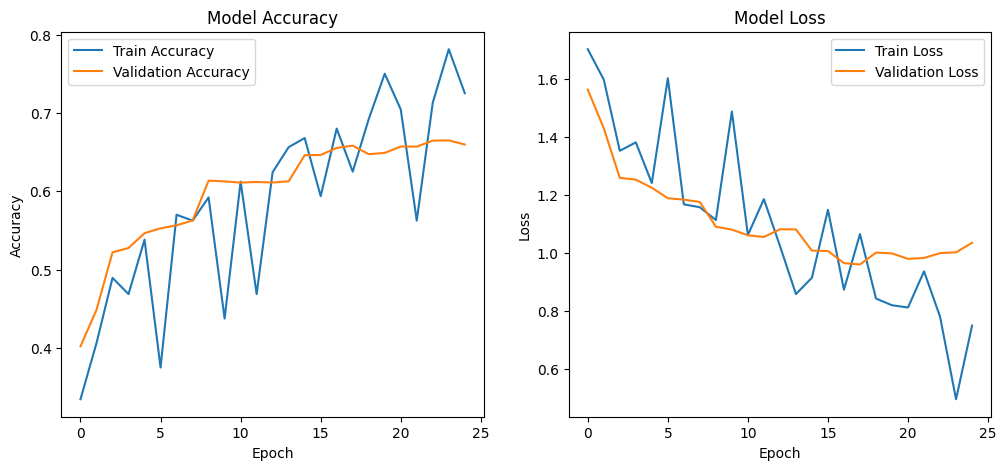

In [5]:
# ====================================
#  PLOTTING
# ====================================
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# ACCURACY
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# LOSS
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


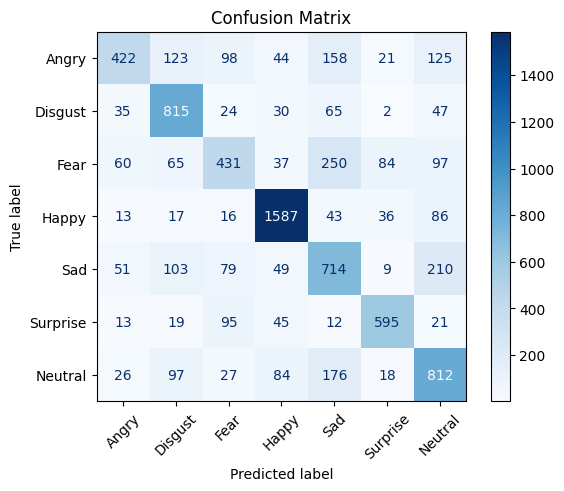

In [6]:
### Trying a confusion matrix:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
y_pred_probs = model.predict(X_valid)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_valid, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display with sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(emotion_dict.values()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


### Key Insights

**Strong Classes (well recognized)**:
- Happy (Row 4): Almost all samples (1,587) are correctly classified as Happy. This is your strongest class.
- Disgust (Row 2): Most predictions (815) fall correctly into Disgust, though there’s some confusion with Sad and Angry.
- Surprise (Row 6) and Neutral (Row 7): Both are also fairly strong, with high correct counts (595 and 812).

**Weak / Confused Classes**
- Fear (Row 3): Only ~431 correct, but many are misclassified as Sad (250), Neutral (97), and Surprise (84).
- Angry (Row 1): 422 correct, but lots of spillover into Sad (158), Disgust (123), and Neutral (125).
- Sad (Row 5): 714 correct, but often confused with Neutral (210) and Disgust (103).

👉 In short: Your model is very good at detecting clear emotions (Happy, Disgust, Surprise, Neutral), but struggles with subtle or overlapping ones (Fear, Sad, Angry).

**Possible Practical Improvements**
- Feature Similarity: Classes like Sad vs. Neutral or Fear vs. Surprise are inherently harder. Adding extra discriminative features (e.g., facial landmarks, attention mechanisms) could help.
- Augmentation focus: Instead of generic augmentation, you could try expression-preserving augmentation (slight blurs, brightness/contrast changes) to simulate real-world variability.
- Model adjustment: Consider fine-tuning more VGG16 layers (instead of freezing almost everything). That can help capture subtle features.